In [ ]:
import requests
import zipfile
import os
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def download_and_save_json(dropbox_url):
    # Create a writable directory for extraction
    extract_dir = "./extracted_data"
    os.makedirs(extract_dir, exist_ok=True)

    # Download the ZIP file
    zip_path = "./data.zip"
    with open(zip_path, "wb") as f:
        f.write(requests.get(dropbox_url).content)

    # Extract the JSON file to the writable directory
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("./")



    # Cleanup
    os.remove(zip_path)
    os.rmdir(extract_dir)  # Remove empty extraction directory



# Example usage
dropbox_url = "https://dl.dropboxusercontent.com/scl/fi/tsxtpikpluoq5jjrx63k0/filtered_reviews_after_2019.json.zip?rlkey=sychiszwmijswnim8qos60hcu&st=cneiepzq"

download_and_save_json(dropbox_url)


In [ ]:
import json
import pandas as pd
cnt = 0

data = []
with open('/content/filtered_reviews_after_2019.json', 'r') as file:
    for line in file:
        cnt+=1
        try:
            data.append(json.loads(line.strip()))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Problematic line: {line[:100]}...")  # Print first 100 chars
            continue

reviews_df1 = pd.DataFrame(data)

In [ ]:
reviews_df1.shape

(1204410, 9)

In [ ]:
reviews_df = reviews_df1[reviews_df1['date'] >= '2021-01-01']

In [ ]:
reviews_df.shape

(649853, 9)

In [ ]:
reviews_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
469,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
557,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
608,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15
644,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
726,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03


In [ ]:
reviews_df.isnull().sum()

,0
review_id,0
user_id,0
business_id,0
stars,0
useful,0
funny,0
cool,0
text,0
date,0


In [ ]:
reviews_df['useful'].value_counts()

,count
useful,
0,421341
1,134935
2,46169
3,18439
4,8633
...,...
236,1
123,1
198,1


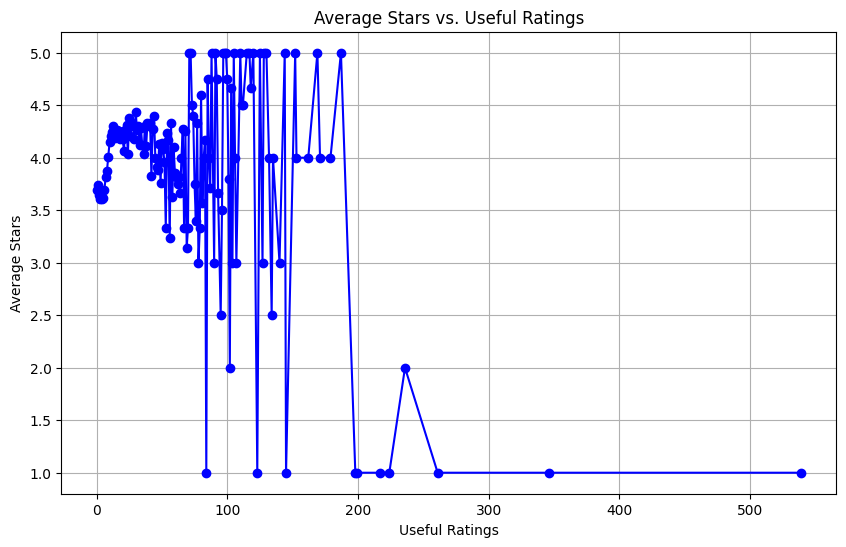

In [ ]:
avg_stars_per_useful = reviews_df.groupby('useful')['stars'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_stars_per_useful['useful'], avg_stars_per_useful['stars'], marker='o', color='b', linestyle='-')
plt.xlabel('Useful Ratings')
plt.ylabel('Average Stars')
plt.title('Average Stars vs. Useful Ratings')
plt.grid(True)
plt.show()

<ipython-input-14-2dc8b2f854c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=reviews_df, palette='viridis')


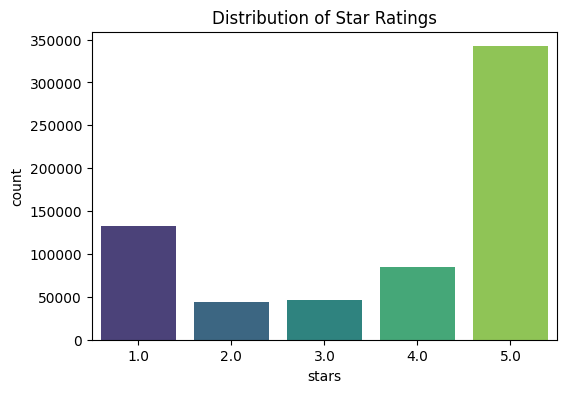

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stars', data=reviews_df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.show()

<ipython-input-15-deaf4c65b4f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['date'] = pd.to_datetime(reviews_df['date'])
<ipython-input-15-deaf4c65b4f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['year'] = reviews_df['date'].dt.year


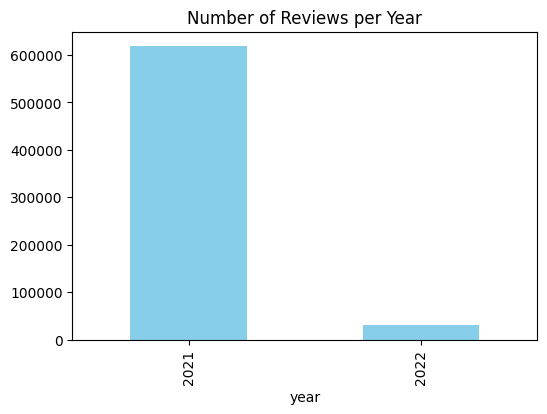

In [ ]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df['year'] = reviews_df['date'].dt.year

plt.figure(figsize=(6, 4))
reviews_df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Year')
plt.show()

In [ ]:

import json
import pandas as pd
cnt = 0

data = []
with open('/content/yelp_buss.json', 'r') as file:
    for line in file:
        cnt+=1
        try:
            data.append(json.loads(line.strip()))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Problematic line: {line[:100]}...")  # Print first 100 chars
            continue

business_df = pd.DataFrame(data)

In [ ]:
business_df.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business_df = business_df[['business_id', 'name', 'state', 'is_open', 'categories']]

In [ ]:
business_df.shape

(150346, 5)

In [ ]:
result_df = pd.merge(reviews_df, business_df, on='business_id', how='left')
result_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,name,state,is_open,categories
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,2021,Unagi & Sushi,LA,1,"Sushi Bars, Restaurants, Japanese"
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1.0,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,2021,Oreland Pizza,PA,1,"Sandwiches, Restaurants, Burgers, Pizza"
2,milJ7UH4Od9pBe2gWac9tA,v7i4M7NIx3bMNMChaXjU7Q,raKflkp3CANr8N7qpQ3ZyQ,5.0,0,0,0,I WISH I was still a Sierra resident. They're ...,2021-02-02 18:14:15,2021,Sierra Property Management,CA,1,"Apartments, Home Services, Real Estate Service..."
3,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5.0,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45,2021,Kings and Queens Liberian Cuisine,PA,1,"Restaurants, African, Vegetarian, Halal, Night..."
4,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03,2021,Butcher & Bee,TN,1,"Middle Eastern, American (New), Restaurants, M..."


In [ ]:
result_df.shape

(649853, 14)

In [ ]:
result_df['is_open'].value_counts()

,count
is_open,
1,640780
0,9073


<Axes: xlabel='is_open', ylabel='count'>

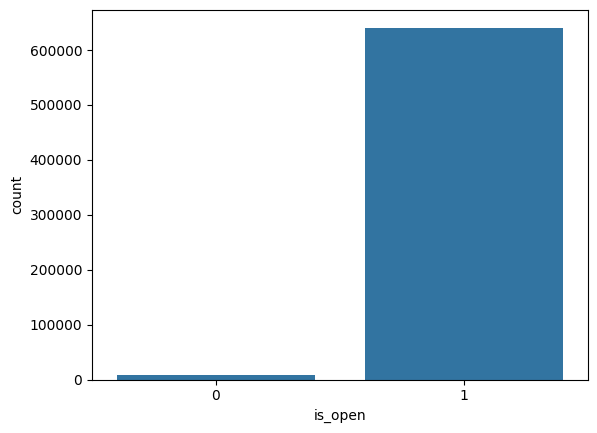

In [ ]:
sns.countplot(x='is_open', data=result_df)

<Axes: xlabel='state', ylabel='count'>

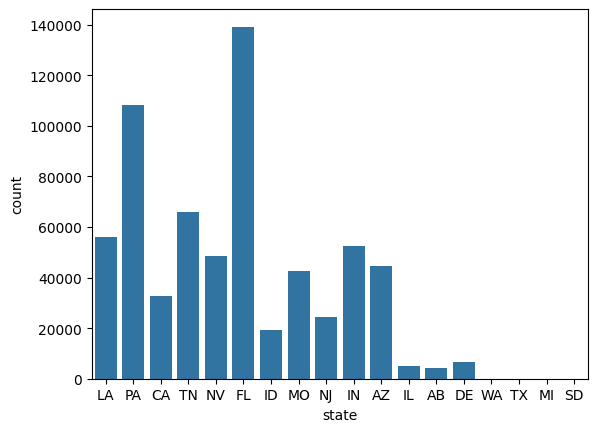

In [ ]:
sns.countplot(x='state', data=result_df)

In [ ]:
result_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'year', 'name', 'state', 'is_open',
       'categories'],
      dtype='object')

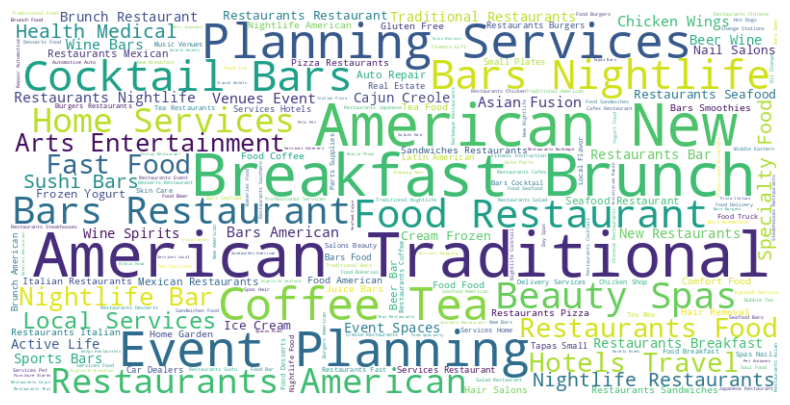

In [ ]:
from wordcloud import WordCloud
text = ' '.join(result_df['categories'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
result_df = result_df[result_df["is_open"] == 1]

In [ ]:
result_df.shape

(640780, 14)

In [ ]:
result_df['name'].isnull().sum()

0

In [ ]:
#visualization for statewise review count

In [ ]:
result_df.drop(columns=['review_id', 'useful', 'funny', 'cool', 'date', 'year','is_open'], axis = 1, inplace=True)

In [ ]:
result_df.shape

(640780, 7)

In [ ]:
#word cloud for categories

In [ ]:
restaurant_df = result_df[result_df['categories'].str.contains('Restaurants', case=False, na=False)]

In [ ]:
top_users = restaurant_df['user_id'].value_counts().nlargest(20000).index.tolist()
top_businesses = restaurant_df['business_id'].value_counts().nlargest(20000).index.tolist()

# Filter the dataframe to include only top users and businesses
restaurant_df = restaurant_df[
    restaurant_df['user_id'].isin(top_users) &
    restaurant_df['business_id'].isin(top_businesses)
]

In [ ]:
restaurant_df.shape

(158849, 7)

In [ ]:
restaurant_df.head()

,user_id,business_id,stars,text,name,state,categories
0,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,I've been eating at this restaurant for over 5...,Unagi & Sushi,LA,"Sushi Bars, Restaurants, Japanese"
4,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,two words: whipped. feta. \nexplosion of amazi...,Butcher & Bee,TN,"Middle Eastern, American (New), Restaurants, M..."
5,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5.0,So day 2 in Nashville. I gotta get some BBQ. M...,Edley's Bar-B-Que - 12 South,TN,"Barbeque, Restaurants, Dive Bars, Cocktail Bar..."
6,h41RIr5Rtkq7EoJ0tU0wgQ,3PlpoDgeAQAreL8FM2LelA,4.0,Place was great as well as parking. \nFood was...,Kauboi Izakaya,NV,"Sushi Bars, Pubs, Gastropubs, Japanese, Restau..."
11,8_yoGifxsLHLRPtyDgMxhw,Rv6P37KiiuowrXti2JHZNQ,5.0,Got this to go and it is for sure authentic! T...,Nuevo Vallarta Authentic Mexican Food,FL,"Event Planning & Services, Chicken Wings, Lati..."


In [ ]:
restaurant_df.columns

Index(['user_id', 'business_id', 'stars', 'text', 'name', 'state',
       'categories'],
      dtype='object')

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
# # from textblob import TextBlob

# # # Assuming you've already loaded your DataFrame
# # # restaurant_df = pd.read_csv('your_data.csv')

# # def get_sentiment(text):
# #     return TextBlob(text).sentiment.polarity

# # # Apply sentiment analysis to the 'text' column
# # restaurant_df['sentiment_score'] = restaurant_df['text'].apply(get_sentiment)

# # restaurant_df.head()
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # Assuming you've already loaded your DataFrame
# # restaurant_df = pd.read_csv('your_data.csv')

# # Create a SentimentIntensityAnalyzer object
# sid = SentimentIntensityAnalyzer()

# def get_vader_sentiment(text):
#     return sid.polarity_scores(text)['compound']

# # Apply VADER sentiment analysis to the 'text' column
# restaurant_df['sentiment_score'] = restaurant_df['text'].apply(get_vader_sentiment)

# restaurant_df.head()

,user_id,business_id,stars,text,name,state,categories,sentiment_score,sentiment_label
0,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,I've been eating at this restaurant for over 5...,Unagi & Sushi,LA,"Sushi Bars, Restaurants, Japanese",0.8947,1
4,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,two words: whipped. feta. \nexplosion of amazi...,Butcher & Bee,TN,"Middle Eastern, American (New), Restaurants, M...",0.4678,1
5,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5.0,So day 2 in Nashville. I gotta get some BBQ. M...,Edley's Bar-B-Que - 12 South,TN,"Barbeque, Restaurants, Dive Bars, Cocktail Bar...",0.9529,1
6,h41RIr5Rtkq7EoJ0tU0wgQ,3PlpoDgeAQAreL8FM2LelA,4.0,Place was great as well as parking. \nFood was...,Kauboi Izakaya,NV,"Sushi Bars, Pubs, Gastropubs, Japanese, Restau...",0.9201,1
11,8_yoGifxsLHLRPtyDgMxhw,Rv6P37KiiuowrXti2JHZNQ,5.0,Got this to go and it is for sure authentic! T...,Nuevo Vallarta Authentic Mexican Food,FL,"Event Planning & Services, Chicken Wings, Lati...",0.9685,1


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(compound_score):
    if compound_score >= 0.05:
        return 0
    elif compound_score <= -0.05:
        return 1
    else:
        return 2

restaurant_df['sentiment_label'] = restaurant_df['text'].apply(lambda x: get_sentiment(analyzer.polarity_scores(x)['compound']))

# Display the updated DataFrame
restaurant_df.head()

,user_id,business_id,stars,text,name,state,categories,sentiment_score,sentiment_label
0,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,I've been eating at this restaurant for over 5...,Unagi & Sushi,LA,"Sushi Bars, Restaurants, Japanese",0.8947,0
4,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,two words: whipped. feta. \nexplosion of amazi...,Butcher & Bee,TN,"Middle Eastern, American (New), Restaurants, M...",0.4678,0
5,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5.0,So day 2 in Nashville. I gotta get some BBQ. M...,Edley's Bar-B-Que - 12 South,TN,"Barbeque, Restaurants, Dive Bars, Cocktail Bar...",0.9529,0
6,h41RIr5Rtkq7EoJ0tU0wgQ,3PlpoDgeAQAreL8FM2LelA,4.0,Place was great as well as parking. \nFood was...,Kauboi Izakaya,NV,"Sushi Bars, Pubs, Gastropubs, Japanese, Restau...",0.9201,0
11,8_yoGifxsLHLRPtyDgMxhw,Rv6P37KiiuowrXti2JHZNQ,5.0,Got this to go and it is for sure authentic! T...,Nuevo Vallarta Authentic Mexican Food,FL,"Event Planning & Services, Chicken Wings, Lati...",0.9685,0


In [ ]:
restaurant_df['sentiment_label'].value_counts()

,count
sentiment_label,
0,144058
1,13413
2,1378


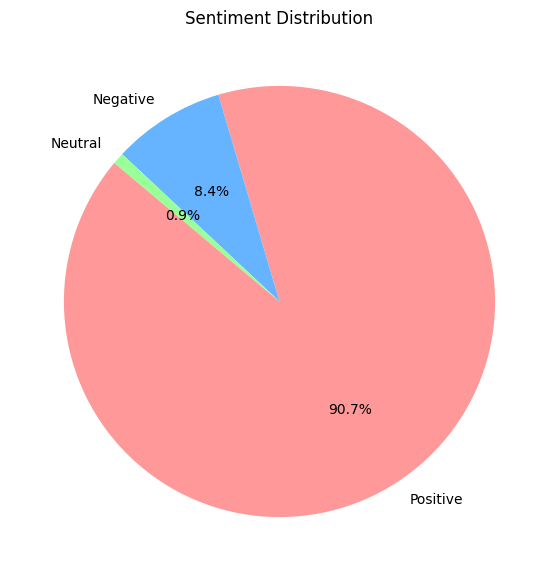

In [ ]:
sentiment_counts = restaurant_df['sentiment_label'].value_counts()

# Define labels for the pie chart
labels = ['Positive', 'Negative', 'Neutral']

# Colors for better distinction (optional)
colors = ['#ff9999','#66b3ff','#99ff99']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
restaurant_df[restaurant_df['sentiment_label'] == 0]['text'].head()

,text
0,I've been eating at this restaurant for over 5...
4,two words: whipped. feta. \nexplosion of amazi...
5,So day 2 in Nashville. I gotta get some BBQ. M...
6,Place was great as well as parking. \nFood was...
11,Got this to go and it is for sure authentic! T...


In [ ]:
for i, d in restaurant_df[restaurant_df['sentiment_label'] == 2].head().iterrows():
  print(d['text'],end="")

Ordered a cheese cavatelli. Has no cheese...? What the heck. Ended up having to find other food to eat. Don't bother. Find another place to order from.The Signature sauce on the Prince Dean's Angel Wings gives Hermanaki®a run for the money!People have been raving about this spot but I didn't love it. Went a few times and thought they were just alright. Probably not one I will actively crave.Have been coming here since it open. The pasta and pizza has lost its way and now taste more like Store supermarket pizza and pasta than what I am used to. We ordered several pasta dishes and 2 pizza slices.  All of us which is a rarity were disappointed. The pesto pasta had pesto that look like it came out of a can and tasted as such. 
This is the second time. Can never come back again.Dropped in to watch the last half of March Madness with some wings and beer. A sign said they were understaffed and to be kind to those working. Probably the best service and timely food I've had in a B dub's in a lo

In [ ]:
# restaurant_df['sentiment_new'] = restaurant_df['text'].apply(lambda x: analyze_sentiment(x))

In [ ]:
from collections import defaultdict
reg = 5
learning_rate = 0.01
iterations = 100
alpha = 0
user_biases = defaultdict(float)
item_biases = defaultdict(float)
validMSE = 0

In [ ]:
restaurant_df.shape

(158849, 9)

In [ ]:
restaurant_df.head()

,user_id,business_id,stars,text,name,state,categories,sentiment_score,sentiment_label
0,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5.0,I've been eating at this restaurant for over 5...,Unagi & Sushi,LA,"Sushi Bars, Restaurants, Japanese",0.8947,0
4,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5.0,two words: whipped. feta. \nexplosion of amazi...,Butcher & Bee,TN,"Middle Eastern, American (New), Restaurants, M...",0.4678,0
5,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5.0,So day 2 in Nashville. I gotta get some BBQ. M...,Edley's Bar-B-Que - 12 South,TN,"Barbeque, Restaurants, Dive Bars, Cocktail Bar...",0.9529,0
6,h41RIr5Rtkq7EoJ0tU0wgQ,3PlpoDgeAQAreL8FM2LelA,4.0,Place was great as well as parking. \nFood was...,Kauboi Izakaya,NV,"Sushi Bars, Pubs, Gastropubs, Japanese, Restau...",0.9201,0
11,8_yoGifxsLHLRPtyDgMxhw,Rv6P37KiiuowrXti2JHZNQ,5.0,Got this to go and it is for sure authentic! T...,Nuevo Vallarta Authentic Mexican Food,FL,"Event Planning & Services, Chicken Wings, Lati...",0.9685,0


In [ ]:
# import pandas as pd
# from collections import defaultdict
# import numpy as np

# allRatings = restaurant_df[['user_id', 'business_id', 'stars']].values  # Extract necessary columns

# # Shuffle the data for randomness (recommended)
# np.random.shuffle(allRatings)

# # Calculate the split indices
# total_size = len(allRatings)
# train_size = int(0.8 * total_size)
# valid_size = int(0.1 * total_size)
# test_size = total_size - train_size - valid_size  # Ensure no data loss due to rounding

# # Split the dataset
# ratingsTrain = allRatings[:train_size]
# ratingsValid = allRatings[train_size:train_size + valid_size]
# ratingsTest = allRatings[train_size + valid_size:]

# # Initialize defaultdicts to store ratings per user and item for the training set
# ratingsPerUser = defaultdict(list)
# ratingsPerItem = defaultdict(list)

# # Populate the defaultdicts with training data
# for user_id, business_id, stars in ratingsTrain:
#     ratingsPerUser[user_id].append((business_id, stars))
#     ratingsPerItem[business_id].append((user_id, stars))

In [ ]:
# all_ratings = [rating for _, _, rating in allRatings]
# global_mean = np.mean(all_ratings)
# alpha = global_mean

In [ ]:
# for _ in range(iterations):

#     for u in ratingsPerUser:

#         numerator = sum(rating - (alpha + item_biases[item]) for item, rating in ratingsPerUser[u])
#         denominator = reg + len(ratingsPerUser[u])
#         user_biases[u] = numerator / denominator

#     for i in ratingsPerItem:
#         numerator = sum(rating - (alpha + user_biases[user]) for user, rating in ratingsPerItem[i])
#         denominator = reg + len(ratingsPerItem[i])
#         item_biases[i] = numerator / denominator

#     curr_mse = mse(alpha, user_biases, item_biases, restaurantRatingsTest)
#     if curr_mse < validMSE:
#         validMSE = curr_mse
#         best_lambda = reg

In [ ]:
import pandas as pd
from collections import defaultdict
import numpy as np

# Assuming 'restaurant_df' contains 'user_id', 'business_id', and 'stars'
allRatings = restaurant_df[['user_id', 'business_id', 'stars']].values  # Extract necessary columns

# Shuffle the data for randomness
np.random.shuffle(allRatings)

# Calculate the split indices for 80/10/10 split
total_size = len(allRatings)
train_size = int(0.8 * total_size)
valid_size = int(0.1 * total_size)

# Split the dataset
ratingsTrain = allRatings[:train_size]
ratingsValid = allRatings[train_size:train_size + valid_size]
ratingsTest = allRatings[train_size + valid_size:]

# Initialize defaultdicts to store ratings per user and item for the training set
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)

# Populate the defaultdicts with training data
for user_id, business_id, stars in ratingsTrain:
    ratingsPerUser[user_id].append((business_id, stars))
    ratingsPerItem[business_id].append((user_id, stars))

# Initialize biases and parameters
alpha = np.mean([rating for _, _, rating in ratingsTrain])  # Global average
user_biases = defaultdict(float)
item_biases = defaultdict(float)
reg = 0.01  # Regularization parameter
iterations = 20  # Number of iterations
validMSE = float('inf')
best_lambda = reg


# # Function to calculate Mean Squared Error (MSE)
# def mse(alpha, user_biases, item_biases, data):
#     errors = []
#     for user_id, business_id, actual_rating in data:
#         pred_rating = alpha + user_biases[user_id] + item_biases[business_id]
#         errors.append((actual_rating - pred_rating) ** 2)
#     return np.mean(errors)

# # Bias calculation loop (training)
# for _ in range(iterations):
#     # Update user biases
#     for u in ratingsPerUser:
#         numerator = sum(rating - (alpha + item_biases[item]) for item, rating in ratingsPerUser[u])
#         denominator = reg + len(ratingsPerUser[u])
#         user_biases[u] = numerator / denominator

#     # Update item biases
#     for i in ratingsPerItem:
#         numerator = sum(rating - (alpha + user_biases[user]) for user, rating in ratingsPerItem[i])
#         denominator = reg + len(ratingsPerItem[i])
#         item_biases[i] = numerator / denominator

#     # Calculate MSE on validation data
#     curr_mse = mse(alpha, user_biases, item_biases, ratingsValid)
#     if curr_mse < validMSE:
#         validMSE = curr_mse
#         best_lambda = reg

# # Calculate final MSE on test data
# test_mse = mse(alpha, user_biases, item_biases, ratingsTest)
# print(f"Best Regularization Parameter (lambda): {best_lambda}")
# print(f"Validation MSE: {validMSE}")
# print(f"Test MSE: {test_mse}")


In [ ]:
# Parameters
alpha = np.mean([rating for _, _, rating in ratingsTrain])  # Global average
user_biases = defaultdict(float)
item_biases = defaultdict(float)
latent_dim = 10  # Number of latent factors
reg = 0.01  # Regularization parameter
learning_rate = 0.01
iterations = 50

# Initialize latent factors randomly
user_factors = defaultdict(lambda: np.random.normal(scale=0.1, size=latent_dim))
item_factors = defaultdict(lambda: np.random.normal(scale=0.1, size=latent_dim))

mse_history = []
# Function to calculate MSE
def mse(alpha, user_biases, item_biases, user_factors, item_factors, data):
    errors = []
    for user_id, business_id, actual_rating in data:
        pred_rating = alpha + user_biases[user_id] + item_biases[business_id] + np.dot(user_factors[user_id], item_factors[business_id])
        errors.append((actual_rating - pred_rating) ** 2)
    return np.mean(errors)

# Training loop
for _ in range(iterations):
    for user_id, business_id, rating in ratingsTrain:
        # Predict the rating
        pred_rating = alpha + user_biases[user_id] + item_biases[business_id] + np.dot(user_factors[user_id], item_factors[business_id])
        error = rating - pred_rating

        # Update biases
        user_biases[user_id] += learning_rate * (error - reg * user_biases[user_id])
        item_biases[business_id] += learning_rate * (error - reg * item_biases[business_id])

        # Update latent factors
        user_factors[user_id] += learning_rate * (error * item_factors[business_id] - reg * user_factors[user_id])
        item_factors[business_id] += learning_rate * (error * user_factors[user_id] - reg * item_factors[business_id])

    # Calculate MSE on validation data
    curr_mse = mse(alpha, user_biases, item_biases, user_factors, item_factors, ratingsValid)
    mse_history.append(curr_mse)
    print(f"Iteration {_+1}: Validation MSE = {curr_mse:.4f}")

# Calculate final MSE on test data
test_mse = mse(alpha, user_biases, item_biases, user_factors, item_factors, ratingsTest)
print(f"Test MSE: {test_mse:.4f}")

Iteration 1: Validation MSE = 1.3992
Iteration 2: Validation MSE = 1.3491
Iteration 3: Validation MSE = 1.3142
Iteration 4: Validation MSE = 1.2886
Iteration 5: Validation MSE = 1.2690
Iteration 6: Validation MSE = 1.2537
Iteration 7: Validation MSE = 1.2416
Iteration 8: Validation MSE = 1.2320
Iteration 9: Validation MSE = 1.2243
Iteration 10: Validation MSE = 1.2182
Iteration 11: Validation MSE = 1.2134
Iteration 12: Validation MSE = 1.2096
Iteration 13: Validation MSE = 1.2066
Iteration 14: Validation MSE = 1.2044
Iteration 15: Validation MSE = 1.2029
Iteration 16: Validation MSE = 1.2018
Iteration 17: Validation MSE = 1.2013
Iteration 18: Validation MSE = 1.2011
Iteration 19: Validation MSE = 1.2014
Iteration 20: Validation MSE = 1.2019
Iteration 21: Validation MSE = 1.2027
Iteration 22: Validation MSE = 1.2038
Iteration 23: Validation MSE = 1.2051
Iteration 24: Validation MSE = 1.2067
Iteration 25: Validation MSE = 1.2084
Iteration 26: Validation MSE = 1.2104
Iteration 27: Validat

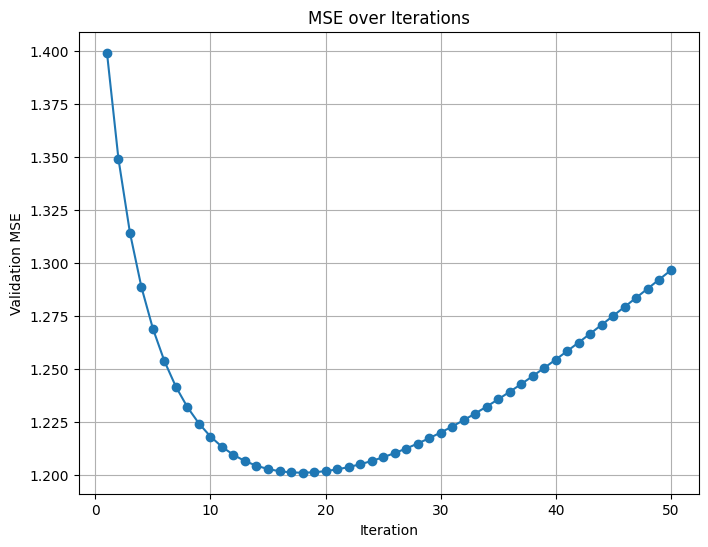

In [ ]:

iterations = np.arange(1, len(mse_history) + 1)

plt.figure(figsize=(8, 6))
plt.plot(iterations, mse_history, marker='o')
plt.title('MSE over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Validation MSE')
plt.grid(True)
plt.show()

In [ ]:
restaurant_df = restaurant_df.drop_duplicates(subset=['user_id', 'business_id'], keep='first')

In [ ]:
restaurant_df.columns

Index(['user_id', 'business_id', 'stars', 'text', 'name', 'state',
       'categories', 'sentiment_score', 'sentiment_label'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix, hstack
import time

def create_sparse_matrices(restaurant_df, n_sample=200000):

    # Limited the number of unique users and businesses to prevent memory explosion
    top_users = restaurant_df['user_id'].value_counts().nlargest(20000).index.tolist()
    top_businesses = restaurant_df['business_id'].value_counts().nlargest(20000).index.tolist()

    # Filter the dataframe to include only top users and businesses
    filtered_df = restaurant_df[
        restaurant_df['user_id'].isin(top_users) &
        restaurant_df['business_id'].isin(top_businesses)
    ]

    # Split the filtered dataset
    train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

    # Sample the training data
    train_df_sampled = train_df.sample(n=min(n_sample, len(train_df)), random_state=42)

    # Create mappings
    user_ids = filtered_df['user_id'].unique()
    business_ids = filtered_df['business_id'].unique()
    user_to_idx = {user: idx for idx, user in enumerate(user_ids)}
    business_to_idx = {business: idx for idx, business in enumerate(business_ids)}

    # Prepare data for CSR matrix
    row_indices = [user_to_idx[row['user_id']] for _, row in filtered_df.iterrows()]
    col_indices = [business_to_idx[row['business_id']] for _, row in filtered_df.iterrows()]
    data_values = filtered_df['stars'].values

    # Create interaction matrix
    interaction_matrix = csr_matrix(
        (data_values, (row_indices, col_indices)),
        shape=(len(user_ids), len(business_ids))
    )

    # Sentiment encoding
    sentiment_encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
    user_sentiment_df = filtered_df[['user_id', 'sentiment']].drop_duplicates('user_id')
    user_sentiment_encoded = sentiment_encoder.fit_transform(
        user_sentiment_df.set_index('user_id').reindex(user_ids).fillna("missing")[['sentiment']]
    )

    # State encoding
    # state_encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
    # business_state_df = filtered_df[['business_id', 'state']].drop_duplicates('business_id')
    # business_state_encoded = state_encoder.fit_transform(
    #     business_state_df.set_index('business_id').reindex(business_ids).fillna("missing")[['state']]
    # )

    business_to_state = filtered_df[['business_id', 'state']].drop_duplicates()

    # Merge states with users via the businesses they reviewed
    user_business_states = filtered_df[['user_id', 'business_id']].merge(
        business_to_state, on='business_id', how='left'
    )

    # One-hot encode state features
    state_encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
    state_encoded = state_encoder.fit_transform(user_business_states[['state']])

    # Create a sparse matrix aligning states to users
    row_indices = user_business_states['user_id'].map(user_to_idx).values
    user_state_encoded = csr_matrix(
        (np.ones(state_encoded.shape[0]), (row_indices, state_encoded.indices)),
        shape=(len(user_ids), state_encoded.shape[1])
    )

    print("Interaction matrix shape:", interaction_matrix.shape)
    print("Sentiment encoded shape:", user_sentiment_encoded.shape)
    print("State encoded shape:", user_state_encoded.shape)

    # Combine matrices
    combined_matrix = hstack([interaction_matrix, user_sentiment_encoded, user_state_encoded])

    # For train and test splits
    train_indices = [user_to_idx[user] for user in train_df_sampled['user_id'] if user in user_to_idx]
    test_indices = [user_to_idx[user] for user in test_df['user_id'] if user in user_to_idx]

    combined_matrix_train = combined_matrix[train_indices]
    combined_matrix_test = combined_matrix[test_indices]

    return {
        'train_matrix': combined_matrix_train,
        'test_matrix': combined_matrix_test,
        'train_users': train_df_sampled['user_id'].unique(),
        'test_users': test_df['user_id'].unique(),
        'user_to_idx': user_to_idx,
        'business_to_idx': business_to_idx
    }


def apply_svd(matrices, n_components=50):

    svd = TruncatedSVD(n_components=n_components)

    # Train the model on the train matrix
    latent_matrix_train = svd.fit_transform(matrices['train_matrix'])

    # Transform the test matrix
    latent_matrix_test = svd.transform(matrices['test_matrix'])

    # Reconstruct the train and test matrices
    reconstructed_train = latent_matrix_train.dot(svd.components_)
    reconstructed_test = latent_matrix_test.dot(svd.components_)

    # Calculate Mean Squared Errors (MSE)
    mse_train = mean_squared_error(matrices['train_matrix'].toarray(), reconstructed_train)
    mse_test = mean_squared_error(matrices['test_matrix'].toarray(), reconstructed_test)

    return {
        'svd': svd,
        'latent_matrix_train': latent_matrix_train,
        'latent_matrix_test': latent_matrix_test,
        'mse_train': mse_train,
        'mse_test': mse_test
    }



class RestaurantRecommender:
    def __init__(self, restaurant_df, n_sample=200000, n_components=50):
        """
        Initialize the recommender system with state and sentiment features.
        """
        self.restaurant_df = restaurant_df
        self.n_sample = n_sample
        self.n_components = n_components
        self._prepare_data()


    def _prepare_data(self):
        """
        Prepare the data matrices for SVD, including state and sentiment.
        """
        matrices_result = create_sparse_matrices(self.restaurant_df, self.n_sample)
        self.matrices = matrices_result
        self.user_to_idx = self.matrices['user_to_idx']
        self.idx_to_user = {idx: user for user, idx in self.user_to_idx.items()}
        self.business_to_idx = self.matrices['business_to_idx']
        self.idx_to_business = {idx: business for business, idx in self.business_to_idx.items()}
        self.filtered_df = self.restaurant_df[
            (self.restaurant_df['user_id'].isin(self.user_to_idx)) &
            (self.restaurant_df['business_id'].isin(self.business_to_idx))
        ]


    def _train_svd(self):
        """
        Train the SVD model with combined matrices.
        """
        svd_results = apply_svd(self.matrices, self.n_components)
        self.svd = svd_results['svd']
        self.latent_matrix_train = svd_results['latent_matrix_train']
        self.latent_user_matrix = self.latent_matrix_train  # Fix here
        self.latent_matrix_test = svd_results['latent_matrix_test']
        self.mse_train = svd_results['mse_train']
        self.mse_test = svd_results['mse_test']



    def evaluate(self):
        """
        Evaluate the model performance.
        """
        return {
            'mse_train': self.mse_train,
            'mse_test': self.mse_test
        }

    def get_top_recommendations(self, user_id, n_recommendations=10):
        """
        Get top restaurant recommendations for a specific user.
        """
        if user_id not in self.user_to_idx:
            raise ValueError(f"User {user_id} not found in the dataset")

        user_idx = self.user_to_idx[user_id]
        user_latent = self.latent_user_matrix[user_idx]

        # Predict ratings
        all_predicted_ratings = user_latent.dot(self.svd.components_)

        # Get businesses the user has already reviewed
        reviewed_business_ids = self.filtered_df[self.filtered_df['user_id'] == user_id]['business_id'].tolist()

        # Mask to identify unreviewed businesses
        unreviewed_mask = ~self.filtered_df['business_id'].isin(reviewed_business_ids)
        unreviewed_business_ids = self.filtered_df.loc[unreviewed_mask, 'business_id'].unique()

        # Map business IDs to matrix indices
        unreviewed_indices = [self.business_to_idx[b_id] for b_id in unreviewed_business_ids]

        # Get predicted ratings for unreviewed businesses
        unreviewed_ratings = [all_predicted_ratings[i] for i in unreviewed_indices]

        # Get top recommendations
        top_indices = np.argsort(unreviewed_ratings)[::-1][:n_recommendations]
        top_business_ids = [unreviewed_business_ids[i] for i in top_indices]

        return self.restaurant_df[self.restaurant_df['business_id'].isin(top_business_ids)].drop_duplicates(subset=['business_id'])

    def get_default_recommendations(self, n_recommendations=10):
        """
        Provide a fallback recommendation for users not found in the dataset.
        """
        top_businesses = self.restaurant_df['business_id'].value_counts().nlargest(n_recommendations).index.tolist()
        return self.restaurant_df[self.restaurant_df['business_id'].isin(top_businesses)].drop_duplicates(subset=['business_id'])



    def evaluate_recommendations(self, user_id, n_recommendations=10):

        # Get recommendations
        recommendations = self.get_top_recommendations(user_id, n_recommendations)

        # Gather additional context
        user_past_reviews = self.filtered_df[self.filtered_df['user_id'] == user_id]

        return {
            'recommendations': recommendations,
            'user_past_reviews': {
                'total_reviews': len(user_past_reviews),
                'avg_rating': user_past_reviews['stars'].mean(),
                'most_reviewed_categories': user_past_reviews['categories'].value_counts().head(),
                'preferred_states': user_past_reviews['state'].value_counts().head()
            }
        }





In [ ]:
start_time = time.time()
# restaurant_df = pd.read_csv('finaldata.csv')
restaurant_df = restaurant_df.drop_duplicates(subset=['user_id', 'business_id'])

# Initialize recommender
recommender = RestaurantRecommender(restaurant_df)

# Train the model
recommender._train_svd()

# Evaluate the model
evaluation = recommender.evaluate()
print("Model Evaluation:")
print(evaluation)

# Generate recommendations for a random user

user_ids = restaurant_df['user_id'].sample(10)

for user_id in user_ids:

    if user_id not in recommender.user_to_idx:
        recommendations = recommender.get_default_recommendations()
        print(f"User {user_id} is not present in the training set, so generating default recommendations")
        # print(f"Recommendations for User {user_id}:")
        print(recommendations[['name', 'categories']])
        print("----------------------------------------------------------")

    else:
        recommendations = recommender.get_top_recommendations(user_id)

        print(f"Recommendations for User {user_id}:")
        print(recommendations[['name', 'categories']])
        evaluation = recommender.evaluate_recommendations(user_id)
        print("\nRecommendation Context:")
        print(f"Total Past Reviews: {evaluation['user_past_reviews']['total_reviews']}")
        print(f"Average Past Rating: {evaluation['user_past_reviews']['avg_rating']:.2f}")
        print("\nMost Reviewed Categories:")
        print(evaluation['user_past_reviews']['most_reviewed_categories'])
        print("----------------------------------------------------------")

end_time = time.time()

print(f"Total time taken for the entire recommendation process is: {(end_time-start_time)/60} mins")